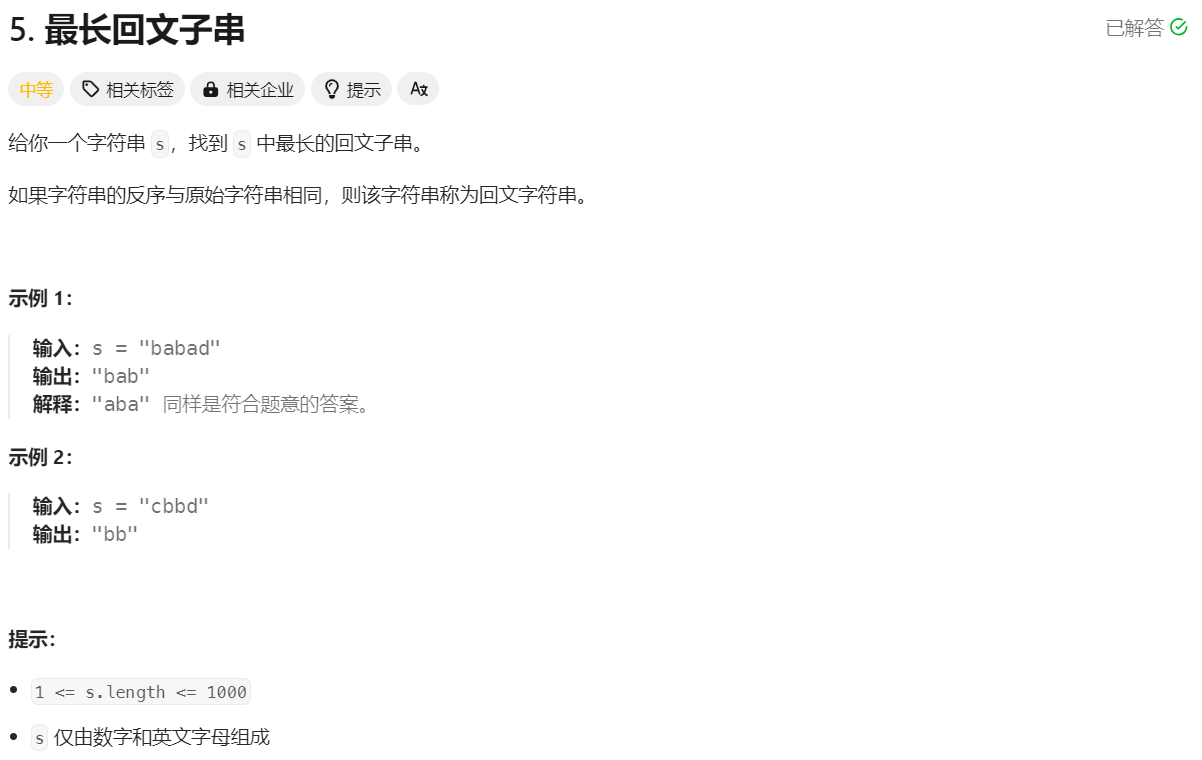

方法一：枚举  
超时 时间复杂度 n^3

In [1]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        max_len = 1
        start = 0
        end = 1
        n = len(s)
        for i in range(n):
            for j in range(i+1,n):
                if s[i:j+1] == s[i:j+1][::-1]:
                    cur_len = (j+1-i)
                    if cur_len > max_len:
                        start = i
                        end = j+1
                        max_len = cur_len
        return s[start:end]

In [2]:
S = Solution()
S.longestPalindrome("abb")

'bb'

方法二：中心扩散   
依次遍历所有元素，并把元素分别作为回文串的中心  
回文串的中心可能是奇数 也可能是偶数 如asa aabbaa  
扩散时只考虑单个字符 而不是对整体进行翻转 避免了时间复杂度达到n^3  时间复杂度降为n^2  

In [3]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        max_d = 0 #偶数中心的最大扩散半径
        odd_d = 0 #奇数中心的最大扩散半径
        n = len(s)
        center_index = 0 #偶数的中心半径
        odd_center = 0 #奇数的中心半径
        isTrue = False
        for i in range(n-1):
            for d in range(1,n//2+1):#扩散半径不超过s长度的一半
                if i-d >= 0 and i+d < n and s[i-d] == s[i+d]:
                    if odd_d < d:
                        odd_d = d
                        odd_center = i
                else:
                    break
            # 对偶数中心进行扩散
            if s[i] == s[i+1]:
                if max_d == 0:
                    center_index = i
                    isTrue = True
                for d in range(1,n//2+1):
                    if i-d >= 0 and i+d+1 < n and s[i-d] == s[i+d+1]:
                        if max_d < d:
                            max_d = d
                            center_index = i
                    else:
                        break
        # 奇数半径大
        if odd_d > max_d:
             return s[odd_center-odd_d:odd_center+odd_d+1]
        # 偶数半径大 且存在偶数中心
        elif odd_d <= max_d and isTrue:
            return s[center_index-max_d:center_index+max_d+2]
        # 长度为1回文串
        else:
            return s[odd_center-odd_d:odd_center+odd_d+1]

In [4]:
S = Solution()
S.longestPalindrome("cbbd")

'bb'